In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Step 1: Loading and Preprocessing Data
# Loading the dataset and performing initial cleaning
df = pd.read_csv("/content/drive/MyDrive/Project Dataset /users.6M0xxK.2024.public.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20743 entries, 0 to 20742
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       20743 non-null  int64  
 1   type                 20743 non-null  object 
 2   countryCode          20710 non-null  object 
 3   country              20743 non-null  object 
 4   language             20743 non-null  object 
 5   socialNbFollowers    20743 non-null  int64  
 6   socialNbFollows      20743 non-null  int64  
 7   socialProductsLiked  20743 non-null  int64  
 8   productsListed       20743 non-null  int64  
 9   productsSold         20743 non-null  int64  
 10  productsPassRate     20743 non-null  float64
 11  productsWished       20743 non-null  int64  
 12  productsBought       20743 non-null  int64  
 13  gender               20743 non-null  object 
 14  civilityGenderId     20743 non-null  int64  
 15  civilityTitle        20743 non-null 

In [30]:
df.head()


,identifierHash,type,countryCode,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,...,productsBought,gender,civilityGenderId,civilityTitle,hasProfilePicture,seniority,seniorityAsMonths,seniorityAsYears,websiteLongevity,seniorityAsDays
0,1920991140,user,us,Etats-Unis,en,3,8,0,0,0,...,0,M,1,mr,True,3206,106.87,8.91,3803,3206.0
1,1920860068,user,se,Suède,en,3,8,1,0,0,...,0,M,1,mr,True,3206,106.87,8.91,3803,3206.0
2,1920401316,user,it,Italie,fr,3,8,0,0,0,...,0,M,1,mr,True,3206,106.87,8.91,3803,3206.0
3,1919811492,user,dk,Danemark,en,75,10,1968,0,0,...,15,M,1,mr,True,3206,106.87,8.91,3803,3206.0
4,1919025060,user,de,Allemagne,de,3,8,0,0,0,...,0,M,1,mr,True,3206,106.87,8.91,3803,3206.0


In [9]:
df.shape

(20743, 22)

In [10]:
df.describe()

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,seniority,seniorityAsMonths,seniorityAsYears,websiteLongevity,seniorityAsDays
count,2.074300e+04,20743.000000,20743.000000,20743.000000,20743.000000,20743.00000,20743.000000,20743.000000,20743.000000,20743.0,20743.000000,20743.000000,20743.00000,20743.0,20743.000000
mean,1.891011e+09,11.326231,15.645712,51.862363,0.622813,2.13431,8.487630,15.045172,2.722894,1.0,3066.299089,102.209844,8.51741,3803.0,3066.299089
std,1.281870e+09,56.131341,512.351535,573.693078,9.117789,15.50530,26.027697,130.633642,23.967183,0.0,168.012782,5.600623,0.46706,0.0,168.012782
min,3.275870e+05,3.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0,2853.000000,95.100000,7.92000,3803.0,2853.000000
25%,8.160869e+08,3.000000,8.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0,2858.000000,95.270000,7.94000,3803.0,2858.000000
50%,1.620902e+09,3.000000,8.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0,3198.000000,106.600000,8.88000,3803.0,3198.000000
75%,2.975891e+09,7.000000,8.000000,16.000000,0.000000,0.00000,0.000000,2.000000,1.000000,1.0,3202.000000,106.730000,8.89000,3803.0,3202.000000
max,4.294836e+09,4134.000000,71045.000000,64267.000000,868.000000,843.00000,100.000000,6241.000000,2679.000000,1.0,3206.000000,106.870000,8.91000,3803.0,3206.000000


In [3]:
# Checking for missing values
print("Missing values:\n", df.isna().sum())

Missing values:
 identifierHash          0
type                    0
countryCode            33
country                 0
language                0
socialNbFollowers       0
socialNbFollows         0
socialProductsLiked     0
productsListed          0
productsSold            0
productsPassRate        0
productsWished          0
productsBought          0
gender                  0
civilityGenderId        0
civilityTitle           0
hasProfilePicture       0
seniority               0
seniorityAsMonths       0
seniorityAsYears        0
websiteLongevity        0
dtype: int64


In [4]:
# Handling missing values
df['countryCode'] = df['countryCode'].fillna('unknown')
df['country'] = df['country'].fillna('unknown')


In [34]:
# Converting seniority to days for recency calculation
df['seniorityAsDays'] = df['seniority'].astype(float)

In [6]:
# Step 2: Feature Engineering for RFM
# Creating RFM features using available proxies
# Recency: Using seniorityAsDays (lower values indicate more recent activity)
rfm_df = df[['identifierHash']].copy()
rfm_df['recency'] = df['seniorityAsDays']


In [7]:
# Frequency: Using productsBought as a proxy for purchase frequency
rfm_df['frequency'] = df['productsBought']

In [14]:
# Monetary: Using productsBought as a proxy (assuming correlation with spend)
rfm_df['monetary'] = df['productsBought']

In [11]:
# Adding behavioral features
rfm_df['social_nb_followers'] = df['socialNbFollowers']
rfm_df['products_wished'] = df['productsWished']
rfm_df['social_products_liked'] = df['socialProductsLiked']

In [12]:
# Adding demographic feature: countryCode
rfm_df['country_code'] = df['countryCode']


In [15]:
# Step 3: Data Transformation
# Handling numerical features: scaling
numerical_features = ['recency', 'frequency', 'monetary', 'social_nb_followers',
                      'products_wished', 'social_products_liked']
scaler = StandardScaler()
rfm_df[numerical_features] = scaler.fit_transform(rfm_df[numerical_features])

In [16]:
# Encoding categorical feature: country_code
rfm_df = pd.get_dummies(rfm_df, columns=['country_code'], prefix='country')


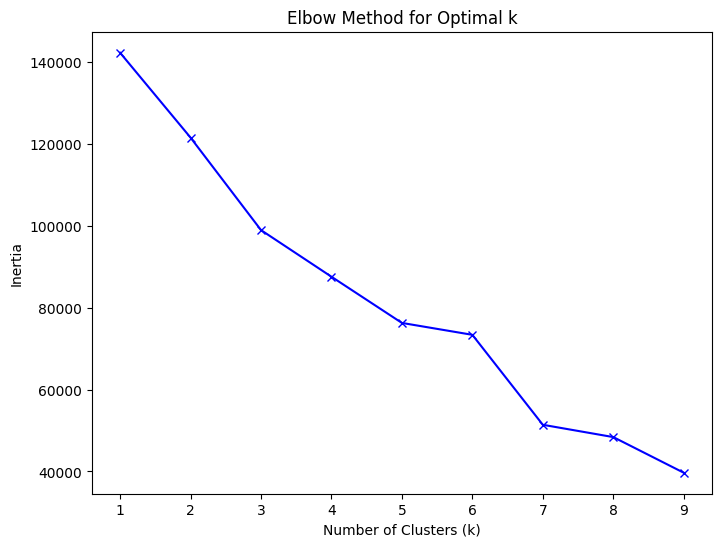

In [19]:
# Step 4: Clustering with K-means
# Determining optimal number of clusters using the elbow method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_df.drop(['identifierHash'], axis=1))
    inertia.append(kmeans.inertia_)
# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.savefig('elbow_curve.png')



In [21]:
# Choosing k=4 based on elbow curve (adjust based on visual inspection)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42) # Removed the call to 'lift' and just used KMeans directly.
rfm_df['cluster'] = kmeans.fit_predict(rfm_df.drop(['identifierHash'], axis=1))

In [22]:
# Step 5: Analyzing Clusters
# Calculating mean values for each cluster to interpret segments
cluster_summary = rfm_df.groupby('cluster')[numerical_features].mean()
print("Cluster Summary (Scaled Values):\n", cluster_summary)

Cluster Summary (Scaled Values):
           recency  frequency  monetary  social_nb_followers  products_wished  \
cluster                                                                        
0        0.801440  -0.026398 -0.026398            -0.016932        -0.036640   
1       -1.247427  -0.025928 -0.025928            -0.025458        -0.028527   
2        0.044876   8.701745  8.701745             6.580283        11.133991   
3       -1.227907   2.598495  2.598495            11.146872         1.768001   

         social_products_liked  
cluster                         
0                    -0.024711  
1                    -0.013951  
2                     5.032809  
3                   111.935612  


In [23]:
# Converting back to original scale for interpretation
cluster_summary_original = pd.DataFrame(
    scaler.inverse_transform(cluster_summary),
    columns=numerical_features,
    index=cluster_summary.index
)
print("Cluster Summary (Original Scale):\n", cluster_summary_original)

Cluster Summary (Original Scale):
              recency   frequency    monetary  social_nb_followers  \
cluster                                                             
0        3200.948054    2.090230    2.090230            10.375854   
1        2856.720396    2.101483    2.101483             9.897281   
2        3073.838710  211.274194  211.274194           380.677419   
3        2860.000000   65.000000   65.000000           637.000000   

         products_wished  social_products_liked  
cluster                                          
0              10.258936              37.686338  
1              11.318665              43.859085  
2            1469.483871            2939.080645  
3             246.000000           64267.000000  


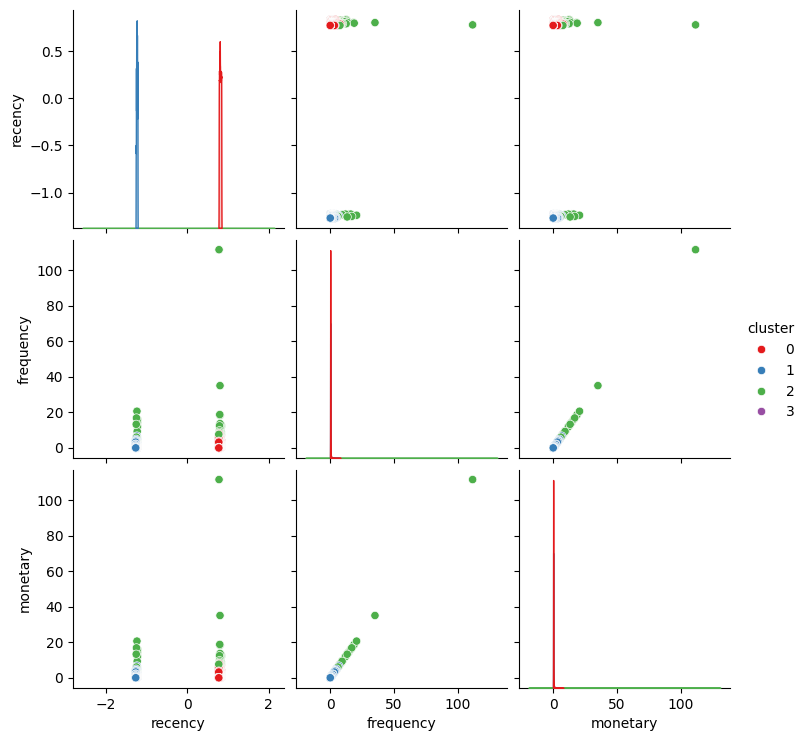

In [25]:
# Step 6: Visualizing Clusters
# Plotting pairplot for key RFM features
sns.pairplot(rfm_df, vars=['recency', 'frequency', 'monetary'], hue='cluster',
             palette='Set1', diag_kind='kde')
plt.savefig('rfm_pairplot.png')



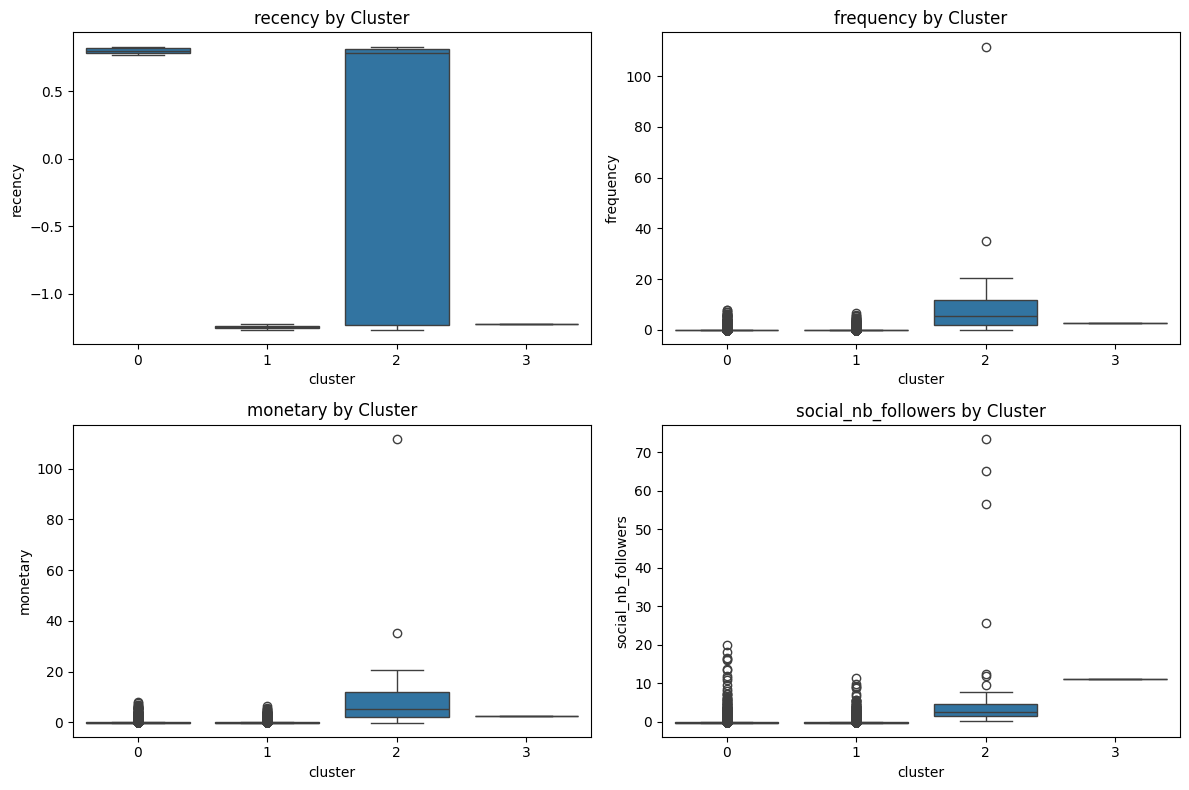

In [26]:
# Plotting boxplots for key features by cluster
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, feature in enumerate(['recency', 'frequency', 'monetary', 'social_nb_followers']):
    sns.boxplot(x='cluster', y=feature, data=rfm_df, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{feature} by Cluster')
plt.tight_layout()
plt.savefig('cluster_boxplots.png')

In [36]:
# Count number of customers per cluster
cluster_counts = rfm_df['cluster'].value_counts().sort_index()

In [37]:
# Step 6: Generate Marketing Summary
# Initialize the summary text
marketing_summary = ["Customer Segmentation Marketing Summary\n",
                    "======================================\n",
                    f"Date: {pd.Timestamp.now().strftime('%Y-%m-%d')}\n\n",
                    f"Total Customers: {len(rfm_df)}\n",
                    f"Number of Clusters: {optimal_k}\n\n"]

In [43]:
# Add cluster details and marketing recommendations
for cluster in range(optimal_k):
    marketing_summary.append(f"Cluster {cluster} (Size: {cluster_counts[cluster]} customers)\n")
    marketing_summary.append("----------------------------------------\n")

    # Cluster characteristics
    summary = cluster_summary_original.loc[cluster]
    marketing_summary.append("Characteristics:\n")
    marketing_summary.append(f"- Avg Recency: {summary['recency']:.2f} days since activity\n")
    marketing_summary.append(f"- Avg Frequency: {summary['frequency']:.2f} products bought\n")
    marketing_summary.append(f"- Avg Monetary: {summary['monetary']:.2f} (proxy: products bought)\n")
    marketing_summary.append(f"- Avg Social Followers: {summary['social_nb_followers']:.2f}\n")
    marketing_summary.append(f"- Avg Products Wished: {summary['products_wished']:.2f}\n")
    marketing_summary.append(f"- Avg Social Products Liked: {summary['social_products_liked']:.2f}\n")

    # Marketing recommendations based on cluster characteristics
    marketing_summary.append("\nMarketing Strategies:\n")

    # Recency-based strategies
    if summary['recency'] > cluster_summary_original['recency'].mean():
        marketing_summary.append("- Inactive Customers: Launch re-engagement campaigns with personalized discounts or reminders.\n")
    else:
        marketing_summary.append("- Active Customers: Maintainmentalized offers to maintain engagement.\n")

    # Frequency-based strategies
    if summary['frequency'] > cluster_summary_original['frequency'].mean():
        marketing_summary.append("- High-Frequency Buyers: Offer loyalty rewards, VIP programs, or exclusive deals.\n")
    else:
        marketing_summary.append("- Low-Frequency Buyers: Encourage repeat purchases with bundled offers or subscription models.\n")

    # Monetary-based strategies (using productsBought as proxy)
    if summary['monetary'] > cluster_summary_original['monetary'].mean():
        marketing_summary.append("- High-Value Customers: Provide premium services or early access to new products.\n")
    else:
        marketing_summary.append("- Low-Value Customers: Promote affordable product lines or entry-level offers.\n")

    # Social engagement strategies
    if summary['social_nb_followers'] > cluster_summary_original['social_nb_followers'].mean():
        marketing_summary.append("- Socially Influential: Target with influencer campaigns or referral programs.\n")

    if summary['social_products_liked'] > cluster_summary_original['social_products_liked'].mean():
        marketing_summary.append("- High Product Engagement: Promote trending or popular products via social media.\n")

    if summary['products_wished'] > cluster_summary_original['products_wished'].mean():
        marketing_summary.append("- High Wish-List Activity: Send personalized product recommendations or wish-list reminders.\n")

    marketing_summary.append("\n")

In [44]:
# Step 7: Save Marketing Summary
# Save the summary to a text file
with open('marketing_summary.txt', 'w') as f:
    f.writelines(marketing_summary)

In [46]:
# Step 8: Save Segmented Dataset
# Save the segmented dataset for reference
rfm_df.to_csv('segmented_customers.csv', index=False)

In [47]:
print("Marketing Summary:\n", ''.join(marketing_summary))

Marketing Summary:
 Customer Segmentation Marketing Summary
Date: 2025-05-04

Total Customers: 20743
Number of Clusters: 4

Cluster 0 (Size: 12590 customers)
----------------------------------------
Characteristics:
- Avg Recency: 3200.95 days since activity
- Avg Frequency: 2.09 products bought
- Avg Monetary: 2.09 (proxy: products bought)
- Avg Social Followers: 10.38
- Avg Products Wished: 10.26
- Avg Social Products Liked: 37.69

Marketing Strategies:
- Inactive Customers: Launch re-engagement campaigns with personalized discounts or reminders.
- Low-Frequency Buyers: Encourage repeat purchases with bundled offers or subscription models.
- Low-Value Customers: Promote affordable product lines or entry-level offers.

Cluster 1 (Size: 8090 customers)
----------------------------------------
Characteristics:
- Avg Recency: 2856.72 days since activity
- Avg Frequency: 2.10 products bought
- Avg Monetary: 2.10 (proxy: products bought)
- Avg Social Followers: 9.90
- Avg Products Wished: 